In [1]:
#Library Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix         
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm

In [2]:
import pandas as pd #importing library
dataset = pd.read_csv("occupancy_data/datatraining.txt") # reading from datatraing.text
dataset.head()      # first 5 rows of the dataset

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [3]:
dataset.describe() 

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [4]:
dataset.isnull().sum() # check if any nan/ null value present or not 

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [5]:
X_train = dataset[dataset.columns[1:6]] # Taking Temperature	Humidity	Light	CO2	HumidityRatio columns
Y_train = dataset[dataset.columns[6]]   # Taking Occupancy column
X_train = X_train.to_numpy()            # converting dataframe ---> numpy array
Y_train = Y_train.to_numpy()            # converting dataframe ---> numpy array

In [6]:
dataset2 = pd.read_csv("occupancy_data/datatest.txt")
x_test = dataset2[dataset2.columns[1:6]].to_numpy()
y_test = dataset2[dataset2.columns[6]].to_numpy()

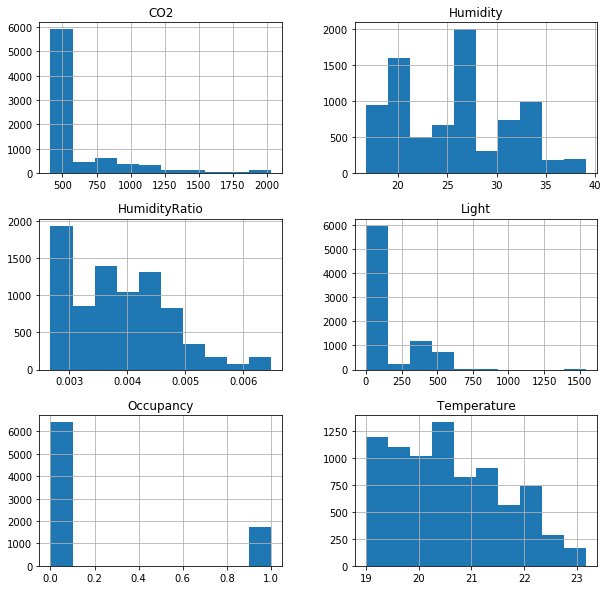

In [7]:
dataset.hist(figsize = (10,10))
plt.show()

In [8]:
def ModelTrainerVisual(x_train,y_train,x_test,y_test):
    
    #KNearestNeighbors classifier
    from sklearn.neighbors import KNeighborsClassifier # importing library
    KNN = KNeighborsClassifier(n_neighbors=5) #Making the instance of sckit - KNN with an optimum setting of 5 neighbor
    KNN.fit(x_train,y_train)
    KnnPrediction_y = KNN.predict(x_test)
    KnnConfusionMatrix = confusion_matrix(KnnPrediction_y,y_test)
    KNTP,KNTN,KNFP,KNFN = KnnConfusionMatrix.ravel()
    
    Precision_KN = KNTP/(KNTP+KNFP)
    Recall_KN = KNTP/(KNTP+KNFN)
    f1_score_KN = (2 * Precision_KN * Recall_KN) / (Precision_KN + Recall_KN)
    
    #Naive Bayes Classifier
    
    NB_Classifier = MultinomialNB()
    NB_Classifier.fit(x_train,y_train)
    NBPrediction_y = NB_Classifier.predict(x_test)
    NBConfusionMatrix = confusion_matrix(NBPrediction_y,y_test)
    NBTP,NBTN,NBFP,NBFN = NBConfusionMatrix.ravel()
    
    Precision_NB = NBTP/(NBTP+NBFP)
    Recall_NB = NBTP/(NBTP+NBFN)
    f1_score_NB = (2 * Precision_NB * Recall_NB) / (Precision_NB + Recall_NB)
    
    #SUPPORT VECTOR MACHINE
    
    SvmClassifier = svm.SVC()
    SvmClassifier.fit(X_train,Y_train)
    SvmPrediction_y = SvmClassifier.predict(x_test)
    SvmConfusionMatrix = confusion_matrix(SvmPrediction_y,y_test)
    SVMTP, SVMTN, SVMFP, SVMFN = SvmConfusionMatrix.ravel()
    
    Precision_SVM = SVMTP/(SVMTP+SVMFP)
    Recall_SVM = SVMTP/(SVMTP+SVMFN)
    f1_score_SVM = (2 * Precision_SVM* Recall_SVM) / (Precision_SVM + Recall_SVM)
    
    #RANDOM FOREST CLASSIFIER
    
    RndmFrstClassifier = RandomForestClassifier()
    RndmFrstClassifier.fit(x_train,y_train)
    RndmFrstClf_y = RndmFrstClassifier.predict(x_test)
    RndmConfusionMatrix = confusion_matrix(RndmFrstClf_y,y_test)
    RDTP,RDTN,RDFP,RDFN = RndmConfusionMatrix.ravel()
    
    Precision_RD = RDTP/(RDTP+RDFP)
    Recall_RD = RDTP/(RDTP+RDFN)
    f1_score_RD = (2 * Precision_RD* Recall_RD) / (Precision_RD + Recall_RD)   
    
    print("[[0]info]  K Nearest Neighbors Details\nPrecision is {0}, Recall value = {1},F1-Score = {2}\n ".format(Precision_KN,Recall_KN,f1_score_KN))
    plot_confusion_matrix(KNN,x_test,y_test) # KNN  prediction plot details
    plt.title("KNN classifier records")
    
    print("[[1]info]  Naive Bayes Classifier Details\nPrecision is {0}, Recall value = {1}, F1-Score = {2}\n".format(Precision_NB,Recall_NB,f1_score_NB))
    plot_confusion_matrix(NB_Classifier,x_test,y_test) # naive bayes prediction details
    plt.title("naive bayes Classifier records")
    
    print("[[1]info]  SUPPORT VECTOR MACHINE Classifier Details\nPrecision is {0}, Recall value = {1}, F1-Score = {2}\n ".format(Precision_SVM,Recall_SVM,f1_score_SVM))
    plot_confusion_matrix(SvmClassifier, x_test,y_test) #Support Vector Machine prediction details
    plt.title("Support vector machine classifier records")
    
    print("[[1]info]  RANDOM FOREST CLASSIFIER Details\nPrecision is {0}, Recall value = {1}, F1-Score = {2} ".format(Precision_RD,Recall_RD,f1_score_RD))
    plot_confusion_matrix(RndmFrstClassifier, x_test,y_test) # Random forest prediction details
    plt.title("Random Forest classifier records")
    plt.show()
    
    names = ['K Nearest', 'Naive Bayes', 'SVM','RANDOM FOREST']
    #Precision_drw = [Precision_KN, Precision_NB,Precision_SVM,Precision_RD]
    #plt.bar(names,Precision_drw)
    
    #TruePositive = [KNTP,NBTP,SVMTP,RDTP]
    #plt.bar(names, TruePositive)
    
    
    
    
    
    

[[0]info]  K Nearest Neighbors Details
Precision is 0.9716479621972829, Recall value = 0.6548566878980892,F1-Score = 0.7824019024970273
 
[[1]info]  Naive Bayes Classifier Details
Precision is 0.954518606024808, Recall value = 0.624420401854714, F1-Score = 0.75496379350619

[[1]info]  SUPPORT VECTOR MACHINE Classifier Details
Precision is 0.9669226225634967, Recall value = 0.6288897426046869, F1-Score = 0.7621042830540037
 
[[1]info]  RANDOM FOREST CLASSIFIER Details
Precision is 0.9686946249261665, Recall value = 0.6482213438735178, F1-Score = 0.7766990291262137 


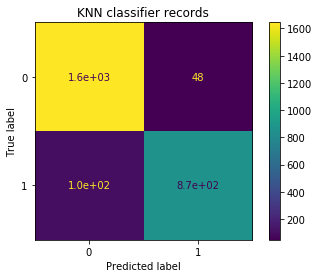

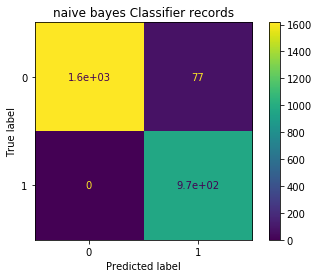

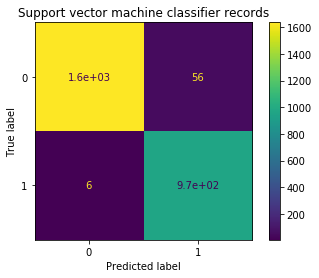

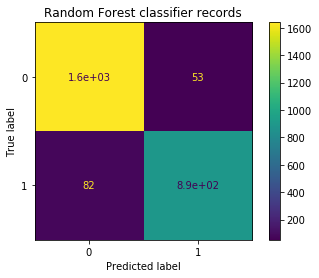

In [15]:
ModelTrainerVisual(X_train,Y_train,x_test,y_test)

In [10]:
#names = ['K Nearest', 'Naive Bayes', 'SVM','RANDOM FOREST']
#Precision = [Precision_KN, Precision_NB,Precision_SVM,Precision_RD]

In [11]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,Y_train)
KnnPrediction_y = KNN.predict(X_train)

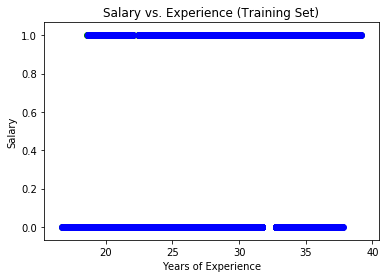

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,1],Y_train,color='green')
plt.scatter(X_train[:,1],KnnPrediction_y,color='blue')
plt.title('Salary vs. Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

[0.9365853658536586, 0.9230769230769231, 0.9350844277673546, 0.9275797373358349, 0.9425891181988743, 0.9324577861163227, 0.9609756097560975, 0.9549718574108818, 0.9617260787992495, 0.9598499061913696, 0.9617260787992495, 0.9606003752345216, 0.9639774859287055, 0.9636022514071294, 0.9696060037523452, 0.9669793621013133, 0.9688555347091933, 0.9662288930581614, 0.973358348968105, 0.9726078799249531, 0.9737335834896811, 0.9729831144465291, 0.975609756097561, 0.975234521575985, 0.9789868667917448, 0.9782363977485928, 0.9782363977485928, 0.9782363977485928, 0.9782363977485928]


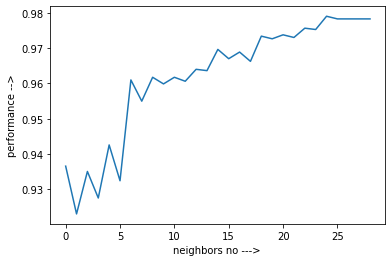

In [13]:
from sklearn.metrics import accuracy_score as acc
performance_list = []
for l in range (1,30):
    knn = KNeighborsClassifier(n_neighbors=l)
    knn.fit(X_train,Y_train)
    y_predict = knn.predict(x_test)
    perform = acc(y_test,y_predict)
    performance_list.append(perform)
print(performance_list)

plt.plot(performance_list)
plt.xlabel('neighbors no ---> ')
plt.ylabel("performance -->")
plt.show()
    

[0.9230769230769231, 0.9181988742964353, 0.9305816135084428, 0.9283302063789869, 0.9234521575984991, 0.9069418386491557, 0.9437148217636022, 0.9358348968105066, 0.9560975609756097, 0.95046904315197, 0.9294559099437149, 0.9407129455909944, 0.950844277673546, 0.9557223264540338, 0.9407129455909944, 0.9470919324577861, 0.9414634146341463, 0.9335834896810506, 0.9452157598499062]


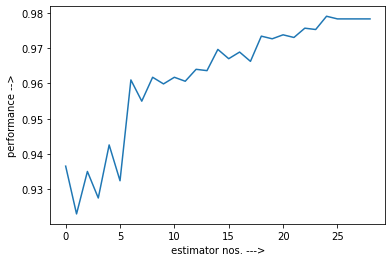

In [14]:
randf_accuracy = []
for i in range(1,20):
    randcl=RandomForestClassifier(n_estimators=i)
    randcl.fit(X_train,Y_train)
    y_predict = randcl.predict(x_test)
    randf_accuracy.append(acc(y_test,y_predict))
print(randf_accuracy)
plt.plot(performance_list)
plt.xlabel(' estimator nos. ---> ')
plt.ylabel("performance -->")
plt.show()